In [325]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [326]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2013', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2013,1752,"Abiodun,Laurel-Smith",2013-09-07,Corporation,New York,NY,10001,0.0,0.0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",2012-01-17,Corporation,New York,NY,10019,0.0,0.0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",2013-07-12,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",2013-04-15,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",2013-07-08,Limited Liability Company,New York,NY,10018,0.0,0.0,0.0,0.0,57,Other,Other: explntion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,2013,FI,"John,Liu",2012-03-23,Other,New York,NY,10036,0.0,0.0,0.0,0.0,17861,Professional Services,Prof. Srvcs.
13165,2013,FI,"John,Liu",2012-04-11,Other,New York,NY,10036,0.0,0.0,0.0,0.0,23053,Professional Services,Prof. Srvcs.
13166,2013,FI,"John,Liu",2012-05-03,Other,New York,NY,10036,0.0,0.0,0.0,0.0,14896,Professional Services,Prof. Srvcs.
13167,2013,FI,"John,Liu",2013-01-02,Other,New York,NY,10036,0.0,0.0,0.0,0.0,50000,Professional Services,Prof. Srvcs.


In [327]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
Contributions_df['zipcode'] = Contributions_df['zipcode'].apply(str)

In [328]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [329]:
Contributions_df.head()

amount  matchamt  \
zipcode date       contributiontype city     state                     
00901   2012-01-17 Corporation      San Juan PR        0.0       0.0   
00907   2011-10-24 Corporation      San Juan PR        0.0       0.0   
        2011-11-14 Corporation      San Juan PR        0.0       0.0   
        2013-11-07 Corporation      San Juan PR        0.0       0.0   
        2013-12-11 Corporation      San Juan PR        0.0       0.0   

                                                    totalamount  \
zipcode date       contributiontype city     state                
00901   2012-01-17 Corporation      San Juan PR             0.0   
00907   2011-10-24 Corporation      San Juan PR             0.0   
        2011-11-14 Corporation      San Juan PR             0.0   
        2013-11-07 Corporation      San Juan PR             0.0   
        2013-12-11 Corporation      San Juan PR             0.0   

                                                    expenditure_amount  
zipcode date       contributiontype city     state                      
00901   2012-01-17 Corporation      San Juan PR                    644  
00907   2011-10-24 Corporation      San Juan PR                    186  
        2011-11-14 Corporation      San Juan PR                    188  
        2013-11-07 Corporation      San Juan PR                   1281  
        2013-12-11 Corporation      San Juan PR                   -256

In [330]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,00901,2012-01-17,Corporation,San Juan,PR,0.0,0.0,0.0,644
1,00907,2011-10-24,Corporation,San Juan,PR,0.0,0.0,0.0,186
2,00907,2011-11-14,Corporation,San Juan,PR,0.0,0.0,0.0,188
3,00907,2013-11-07,Corporation,San Juan,PR,0.0,0.0,0.0,1281
4,00907,2013-12-11,Corporation,San Juan,PR,0.0,0.0,0.0,-256
...,...,...,...,...,...,...,...,...,...
29469,None,2013-11-25,Corporation,New York,NY,0.0,0.0,0.0,35635
29470,None,2013-12-16,Corporation,New York,NY,0.0,0.0,0.0,8095
29471,None,2014-01-10,Corporation,New York,NY,0.0,0.0,0.0,8350
29472,None,2014-01-10,Individual,Paterson,NY,0.0,0.0,0.0,1


In [331]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
features = list(Contributions_df_enc.columns)
Contributions_df_enc[features] = scaler.fit_transform(Contributions_df_enc[features])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0.000000,0.526897,0.363636,0.782501,0.67033,0.300809,0.0,0.269051,0.062249
1,0.000397,0.471034,0.363636,0.782501,0.67033,0.300809,0.0,0.269051,0.061967
2,0.000397,0.484828,0.363636,0.782501,0.67033,0.300809,0.0,0.269051,0.061968
3,0.000397,0.967586,0.363636,0.782501,0.67033,0.300809,0.0,0.269051,0.062642
4,0.000397,0.985517,0.363636,0.782501,0.67033,0.300809,0.0,0.269051,0.061694


In [332]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               2517
date                  1451
contributiontype        12
city                  2024
state                   92
amount                 919
matchamt               286
totalamount           1274
expenditure_amount    2281
dtype: int64

In [333]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [334]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [335]:
regr = RandomForestRegressor()

In [336]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [337]:
y_pred = regr.predict(X_test)
print(len(y_pred))

8843


In [338]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.8544394527028432


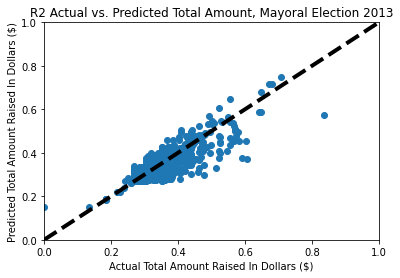

In [339]:
# %matplotlib inline
print(r_squared)
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2 Actual vs. Predicted Total Amount, Mayoral Election 2013')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../ResourcesPredicted_Total_Amount_Regression_2013.png')

In [340]:
pred_df = X_test
pred_df['Total Amount'] = y_test
pred_df['Predicted Total Amount'] = y_pred
pred_df.head()

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,zipcode,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Total Amount,Predicted Total Amount
26658,0.631558,0.895862,0.454545,0.219476,0.703297,0.304617,0.000000,0.061852,0.272456,0.275390
1470,0.115262,0.890345,0.363636,0.606525,0.516484,0.300809,0.000000,0.067703,0.269051,0.269051
12013,0.255167,0.905517,0.090909,0.852694,0.560440,0.300809,0.000000,0.062963,0.269051,0.269051
26727,0.639507,0.859310,0.454545,0.027187,0.219780,0.319848,0.000000,0.061852,0.286079,0.298076
7031,0.221383,0.473103,0.454545,0.605042,0.560440,0.301761,0.009852,0.061852,0.270754,0.270873


In [341]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

0.014151395790155206
